In [34]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor

In [2]:
data=pd.read_csv("listings.csv", low_memory=False)
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2060,https://www.airbnb.com/rooms/2060,20200408162728,2020-04-09,Modern NYC,NaN,"Lovely, spacious, sunny 1 BR apartment in 6th ...","Lovely, spacious, sunny 1 BR apartment in 6th ...",none,NaN,...,f,f,flexible,f,f,1,0,1,0,0.01
1,2595,https://www.airbnb.com/rooms/2595,20200408162728,2020-04-10,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.38
2,3831,https://www.airbnb.com/rooms/3831,20200408162728,2020-04-11,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,moderate,f,f,1,1,0,0,4.68
3,5099,https://www.airbnb.com/rooms/5099,20200408162728,2020-04-10,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,f,f,moderate,t,t,1,1,0,0,0.58
4,5121,https://www.airbnb.com/rooms/5121,20200408162728,2020-04-09,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.38


In [3]:
len(data)

50378

In [4]:
filtered_data=data[["neighbourhood_group_cleansed", "neighbourhood_cleansed", "zipcode", "room_type",
                    "accommodates", "bedrooms", "bathrooms", "guests_included", "price", "extra_people",
                    "minimum_nights", "maximum_nights", "availability_30", "cancellation_policy", 
                    "number_of_reviews", "review_scores_rating", "longitude", "latitude"]]
filtered_data.head()

,neighbourhood_group_cleansed,neighbourhood_cleansed,zipcode,room_type,accommodates,bedrooms,bathrooms,guests_included,price,extra_people,minimum_nights,maximum_nights,availability_30,cancellation_policy,number_of_reviews,review_scores_rating,longitude,latitude
0,Manhattan,Washington Heights,10040,Private room,2,1.0,NaN,1,$100.00,$0.00,1,730,30,flexible,1,80.0,-73.93790,40.85722
1,Manhattan,Midtown,10018,Entire home/apt,2,0.0,1.0,1,$225.00,$0.00,3,1125,30,strict_14_with_grace_period,48,94.0,-73.98377,40.75362
2,Brooklyn,Clinton Hill,11238,Entire home/apt,3,1.0,1.0,1,$89.00,$0.00,1,730,30,moderate,315,89.0,-73.95976,40.68514
3,Manhattan,Murray Hill,10016,Entire home/apt,2,1.0,1.0,2,$200.00,$100.00,3,21,0,moderate,78,90.0,-73.97500,40.74767
4,Brooklyn,Bedford-Stuyvesant,11216,Private room,2,1.0,NaN,1,$60.00,$30.00,29,730,30,strict_14_with_grace_period,50,90.0,-73.95596,40.68688


In [5]:
filtered_data.isnull().sum()

neighbourhood_group_cleansed        0
neighbourhood_cleansed              0
zipcode                           440
room_type                           0
accommodates                        0
bedrooms                           97
bathrooms                          59
guests_included                     0
price                               0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
availability_30                     0
cancellation_policy                 0
number_of_reviews                   0
review_scores_rating            11681
longitude                           0
latitude                            0
dtype: int64

In [6]:
filtered_data['number_of_reviews'].value_counts()

0      10704
1       5448
2       3481
3       2559
4       2003
       ...  
560        1
496        1
368        1
463        1
383        1
Name: number_of_reviews, Length: 434, dtype: int64

In [7]:
#using the median value for filling the missing numerical information
filtered_data[['review_scores_rating']] = filtered_data[['review_scores_rating']].apply(lambda col: col.fillna(0))
filtered_data[['bedrooms']]=filtered_data[['bedrooms']].apply(lambda col: col.fillna(col.median()))
filtered_data[['bathrooms']]=filtered_data[['bathrooms']].apply(lambda col: col.fillna(col.median()))

C:\Users\sveta\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
#removing '$' from price column
filtered_data['price'] = filtered_data['price'].astype("str")
filtered_data['price'] = filtered_data['price'].str.replace('$', '')
filtered_data['price'] = pd.to_numeric(filtered_data['price'], errors='coerce')

filtered_data=filtered_data.dropna(subset=['price'])


C:\Users\sveta\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sveta\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sveta\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [9]:
#removing '$' from extra_people column
filtered_data['extra_people'] = filtered_data['extra_people'].astype("str")
filtered_data['extra_people'] = filtered_data['extra_people'].str.replace('$', '')
filtered_data['extra_people'] = pd.to_numeric(filtered_data['extra_people'], errors='coerce')


In [10]:
#cleaning values in zipcode column

filtered_data["zipcode"].replace({"NY 10001": "10001"}, inplace=True)
filtered_data["zipcode"].replace({"NY 10002": "10002"}, inplace=True)
filtered_data["zipcode"].replace({"NY 10003": "10003"}, inplace=True)
filtered_data["zipcode"].replace({"NY 10004": "10004"}, inplace=True)
filtered_data["zipcode"].replace({"NY 10005": "10005"}, inplace=True)
filtered_data["zipcode"].replace({"NY 10006": "10006"}, inplace=True)
filtered_data["zipcode"].replace({"NY 10007": "10007"}, inplace=True)
filtered_data["zipcode"].replace({"1009": "10009"}, inplace=True)
filtered_data["zipcode"].replace({"NY 10010": "10010"}, inplace=True)
filtered_data["zipcode"].replace({"NY 10011": "10011"}, inplace=True)
filtered_data["zipcode"].replace({"NY 10012": "10012"}, inplace=True)
filtered_data["zipcode"].replace({"NY 10014": "10014"}, inplace=True)
filtered_data["zipcode"].replace({"NY 10016": "10016"}, inplace=True)
filtered_data["zipcode"].replace({"NY 10017": "10017"}, inplace=True)
filtered_data["zipcode"].replace({"NY 10018": "10018"}, inplace=True)
filtered_data["zipcode"].replace({"NY 10019": "10019"}, inplace=True)
filtered_data["zipcode"].replace({"NY 10022": "10022"}, inplace=True)
filtered_data["zipcode"].replace({"NY 10023": "10023"}, inplace=True)
filtered_data["zipcode"].replace({"NY 10024": "10024"}, inplace=True)
filtered_data["zipcode"].replace({"NY 10028": "10028"}, inplace=True)
filtered_data["zipcode"].replace({" 10036": "10036"}, inplace=True)
filtered_data["zipcode"].replace({"NY 10036": "10036"}, inplace=True)
filtered_data["zipcode"].replace({"NY 10038": "10038"}, inplace=True)
filtered_data["zipcode"].replace({"NY 10065": "10065"}, inplace=True)
filtered_data["zipcode"].replace({"NY 10075": "10075"}, inplace=True)
filtered_data["zipcode"].replace({"NY 10128": "10128"}, inplace=True)
filtered_data["zipcode"].replace({"NY 10280": "10280"}, inplace=True)
filtered_data["zipcode"].replace({" ": "11104"}, inplace=True)
filtered_data["zipcode"].replace({"NY 11201": "11201"}, inplace=True)
filtered_data["zipcode"].replace({"NY 11249": "11249"}, inplace=True)
filtered_data["zipcode"].replace({" 11374": "11374"}, inplace=True)
filtered_data["zipcode"].replace({"11385-2308": "11385"}, inplace=True)
filtered_data["zipcode"].replace({"11249\n11249": "11249"}, inplace=True)
filtered_data["zipcode"].replace({"11103-3233": "11103"}, inplace=True)
filtered_data["zipcode"].replace({"11692-2304": "11692"}, inplace=True)
filtered_data["zipcode"].replace({"11413-3220": "11413"}, inplace=True)

In [11]:
#drop all the rows with NaN values
filtered_data=filtered_data.dropna()

In [12]:
filtered_data=filtered_data.rename(columns={'neighbourhood_cleansed':"neighbourhood", "neighbourhood_group_cleansed":"borough"})

In [13]:
filtered_data.to_csv("ny_airbnb_data.csv")

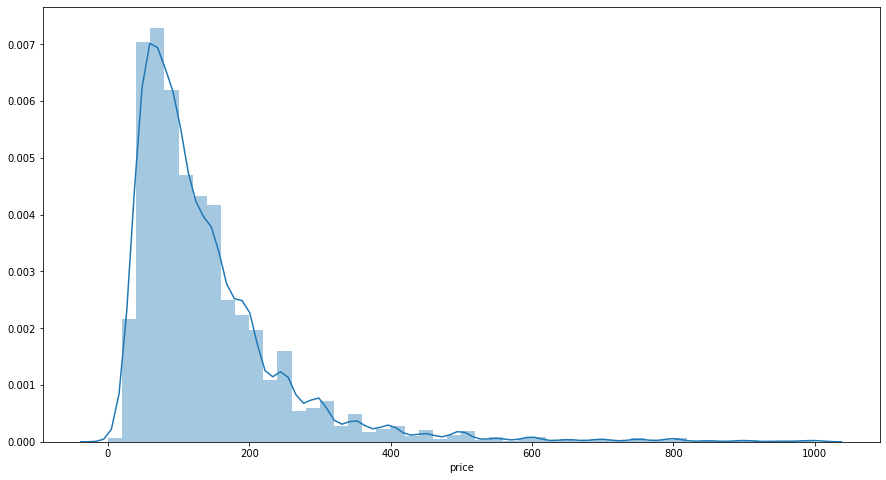

In [66]:
plt.figure(figsize=(15,8))
sns.distplot(filtered_data['price'], kde=True);
plt.savefig("price_distribution.png")

In [68]:
filtered_data.describe()

,accommodates,bedrooms,bathrooms,guests_included,price,extra_people,minimum_nights,maximum_nights,availability_30,number_of_reviews,...,11433,11434,11435,11436,11559,11691,11692,11693,11694,91766
count,49526.000000,49526.000000,49526.00000,49526.000000,49526.000000,49526.000000,49526.000000,4.952600e+04,49526.000000,49526.000000,...,49526.000000,49526.000000,49526.000000,49526.000000,49526.000000,49526.000000,49526.000000,49526.000000,49526.000000,49526.000000
mean,2.835460,1.174959,1.13822,1.505714,138.384485,13.854521,7.720632,8.813232e+04,12.075940,24.929411,...,0.000929,0.004099,0.001575,0.000767,0.000020,0.001171,0.001636,0.001070,0.000182,0.000020
std,1.823279,0.742548,0.39672,1.134471,112.085641,23.860245,21.300952,1.364716e+07,13.309211,49.070961,...,0.030462,0.063892,0.039655,0.027689,0.004493,0.034202,0.040409,0.032696,0.013479,0.004493
min,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.00000,1.000000,68.000000,0.000000,1.000000,2.900000e+01,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,1.00000,1.000000,103.000000,0.000000,3.000000,1.000000e+03,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,1.000000,1.00000,2.000000,175.000000,20.000000,5.000000,1.125000e+03,29.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,21.000000,6.50000,16.000000,999.000000,300.000000,1250.000000,2.147484e+09,30.000000,746.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
corrMatrix = filtered_data.corr()
corrMatrix['price'].sort_values(ascending=False)

price                   1.000000
accommodates            0.519635
bedrooms                0.383262
guests_included         0.297153
bathrooms               0.275869
extra_people            0.072431
availability_30         0.069182
latitude                0.058181
minimum_nights          0.024504
maximum_nights          0.001936
number_of_reviews      -0.047964
review_scores_rating   -0.055872
longitude              -0.256810
Name: price, dtype: float64

In [16]:
filtered_data['zipcode'].value_counts()

11211    2123
11221    1947
11206    1510
11216    1363
10019    1312
         ... 
11243       1
10118       1
10278       1
10704       1
10080       1
Name: zipcode, Length: 193, dtype: int64

In [17]:
one_hot_zipcode = pd.get_dummies(filtered_data.zipcode) 
one_hot_zipcode=one_hot_zipcode.drop(columns=["11211"])

In [18]:
filtered_data['room_type'].describe()

count               49526
unique                  4
top       Entire home/apt
freq                25742
Name: room_type, dtype: object

In [19]:
one_hot_room_type = pd.get_dummies(filtered_data.room_type) 
one_hot_room_type=one_hot_room_type.drop(columns=["Entire home/apt"])

In [20]:
filtered_data['cancellation_policy'].describe()

count                           49526
unique                              6
top       strict_14_with_grace_period
freq                            22393
Name: cancellation_policy, dtype: object

In [21]:
one_hot_cancellation_policy = pd.get_dummies(filtered_data.cancellation_policy) 
one_hot_cancellation_policy=one_hot_cancellation_policy.drop(columns=["strict_14_with_grace_period"])

In [22]:
filtered_data['neighbourhood'].describe()

count            49526
unique             222
top       Williamsburg
freq              3773
Name: neighbourhood, dtype: object

In [23]:
one_hot_neighbourhood = pd.get_dummies(filtered_data.neighbourhood) 
one_hot_neighbourhood=one_hot_neighbourhood.drop(columns=["Williamsburg"])

In [24]:
filtered_data['borough'].describe()

count         49526
unique            5
top       Manhattan
freq          21879
Name: borough, dtype: object

In [25]:
one_hot_borough = pd.get_dummies(filtered_data.borough) 
one_hot_borough=one_hot_borough.drop(columns=["Manhattan"])

In [26]:
#removing categorical features 
filtered_data.drop(['cancellation_policy', 'neighbourhood', 'borough', 'room_type', 'zipcode'],axis=1,inplace=True)

In [27]:
#merging one hot encoded features with our filtered_data dataset  
filtered_data=pd.concat([filtered_data,one_hot_cancellation_policy,one_hot_borough, one_hot_neighbourhood,one_hot_room_type, one_hot_zipcode],axis=1) 

In [28]:
filtered_data.drop(['longitude', 'latitude'],axis=1,inplace=True)

In [30]:
#Linear Model
y = filtered_data['price']
print(y.shape)
X = filtered_data.drop(columns=["price"])
print(X.shape)

(49526,)
(49526, 435)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.90)


In [36]:
L_model=LinearRegression()
L_model.fit(X_train, y_train)
print(f"Training score: {L_model.score(X_train, y_train)}")
print(f"Testing score: {L_model.score(X_test, y_test)}")
predictions=L_model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions)) 

Training score: 0.5163595792779099
Testing score: 0.5283754957313462
Mean Absolute Error: 45.65046370329806


In [40]:
#Light GBM(Gradient Boosting Machines)
B_model=LGBMRegressor()
B_model.fit(X_train, y_train)
print(f"Training score: {B_model.score(X_train, y_train)}")
print(f"Testing score: {B_model.score(X_test, y_test)}")
predictions=B_model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))

Training score: 0.6582435648912046
Testing score: 0.6039084554628432
Mean Absolute Error: 39.89668656256952


In [41]:
model=LGBMRegressor(n_estimators=500, learning_rate=0.05, num_leaves=55)
model.fit(X_train, y_train)
print(f"Training score: {model.score(X_train, y_train)}")
print(f"Testing score: {model.score(X_test, y_test)}")
predictions=B_model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))

Training score: 0.7433151115376537
Testing score: 0.6148789744460471
Mean Absolute Error: 39.89668656256952


In [70]:
predictions=B_model.predict(X_test)

predictions_df=pd.DataFrame({"Actual": y_test, "Prediction": predictions })
predictions_df.head()

,Actual,Prediction
22848,90.0,124.008864
24282,70.0,105.801686
21622,129.0,118.575124
40266,62.0,42.333717
11602,200.0,252.597417


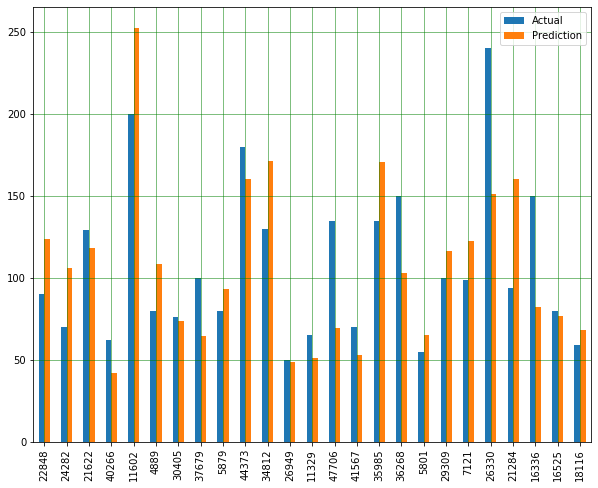

In [71]:
df = predictions_df.head(25)
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [42]:
#Gradient Boosting Machine for Regression
from sklearn.ensemble import GradientBoostingRegressor

y = filtered_data['price']
X = filtered_data.drop(columns=["price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.90)

model = GradientBoostingRegressor()
model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [43]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5463245136991375

In [44]:
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=500, subsample=0.4, max_depth=5)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.741795420211117
0.5985359907598753


In [45]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

y = filtered_data['price']
X = filtered_data.drop(columns=["price"])

model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6031536580461938

In [46]:
#Gradient Boosting With XGBoost
from xgboost import XGBRegressor

model = XGBRegressor(objective='reg:squarederror')
model

model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7218983535022361
0.6027071454361995


In [ ]:
#room type prediction
from lightgbm import LGBMClassifier

y = filtered_data['room_type']
X = filtered_data.drop(columns=["room_type"])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.8)

model=LGBMClassifier()
model.fit(X_train, y_train)
print(f"Training score: {model.score(X_train, y_train)}")
print(f"Testing score: {model.score(X_test, y_test)}")